In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd /content/drive/MyDrive/new_tick_data_2

/content/drive/MyDrive/new_tick_data_2


In [2]:
!pip install -U albumentations

     |████████████████████████████████| 102 kB 33.8 MB/s 
     |████████████████████████████████| 47.6 MB 76 kB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [3]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import random
import os

In [4]:
def visualize(image):
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(image)

In [5]:
transform = A.Compose([
    A.ShiftScaleRotate(rotate_limit=(0,270), p=0.9), 
    A.RandomBrightnessContrast(p=0.7), 
    A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.7)
], bbox_params=A.BboxParams(format='yolo'))

In [11]:
image = cv2.imread('/content/drive/MyDrive/new_tick_data_2/YOLO_AUGMENTED_new_tick_data/images/train/0SF_180.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [13]:
with open('/content/drive/MyDrive/new_tick_data_2/YOLO_AUGMENTED_new_tick_data/labels/train/0SF_180.txt', 'r') as f:
    lines = [line.strip() for line in f.readlines()]
label = [float(i) for i in lines[0].split(' ')]
obj_class = label.pop(0)
label.append(str(obj_class))
label = [label]

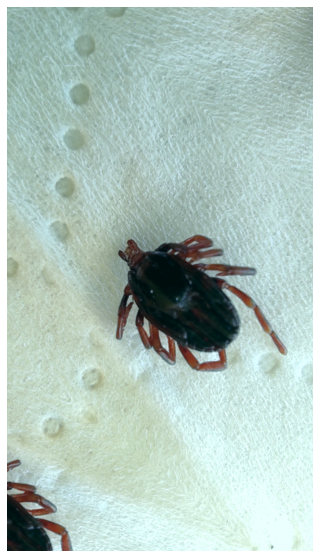

In [14]:
transformed = transform(image=image, bboxes=label)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
visualize(transformed_image)

# Code for augmentation

In [15]:
def augumentation(image, bbox_list):
    object_list = []
    for bbox in bbox_list:
        label = [float(i) for i in bbox.split(' ')]
        obj_class = label.pop(0)
        label.append(str(obj_class))
        object_list.append(label)
    
    if float(object_list[0][4]) not in [0, 1.0, 2.0, 3.0]:    
        transformed = transform(image=image, bboxes=object_list)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
    
        transformed_bbox_list = []
        for i in transformed_bboxes:
            i = list(i)
            obj_class = i.pop(4)
            i.insert(0, float(obj_class))
            transformed_bbox_list.append(i)
           
        return transformed_image, transformed_bbox_list
    else:
        return None

In [ ]:
with open('1 (2).txt', 'r') as f:
    lines = [line.strip() for line in f.readlines()]

In [ ]:
a = augumentation(image, lines)

In [16]:
image_path = '/content/drive/MyDrive/new_tick_data_2/YOLO_AUGMENTED_new_tick_data/images/train'
label_path = '/content/drive/MyDrive/new_tick_data_2/YOLO_AUGMENTED_new_tick_data/labels/train'

image_list = []
label_list = []
for image_name in os.listdir(image_path):
    image = cv2.imread(image_path+'/'+image_name)
    image_list.append(image)

for file in os.listdir(label_path):
    with open(label_path+'/'+file, 'r') as f:
        lines = [line.strip() for line in f.readlines()]
        label_list.append(lines)

In [18]:
aug_data_path = "/content/drive/MyDrive/new_tick_data_2/aug_data/train/"
for loop in range(5):
  for i in range(len(image_list)):
      augmented_data = augumentation(image_list[i], label_list[i])
      
      if augmented_data==None:
              continue
      else:
          image = augmented_data[0]
          bbox = augmented_data[1]
          
          cv2.imwrite(aug_data_path+f"aug_{loop}_{i}.jpg", image)
          with open(aug_data_path+f"aug_{loop}_{i}.txt", 'w') as f:
              for obj in bbox:
                  f.write(f'{obj[0]} {obj[1]} {obj[2]} {obj[3]} {obj[4]}')

In [19]:
image_path = '/content/drive/MyDrive/new_tick_data_2/YOLO_AUGMENTED_new_tick_data/images/test'
label_path = '/content/drive/MyDrive/new_tick_data_2/YOLO_AUGMENTED_new_tick_data/labels/test'

image_list = []
label_list = []
for image_name in os.listdir(image_path):
    image = cv2.imread(image_path+'/'+image_name)
    image_list.append(image)

for file in os.listdir(label_path):
    with open(label_path+'/'+file, 'r') as f:
        lines = [line.strip() for line in f.readlines()]
        label_list.append(lines)

In [20]:
aug_data_path = "/content/drive/MyDrive/new_tick_data_2/aug_data/test/"
for loop in range(5):
  for i in range(len(image_list)):
      augmented_data = augumentation(image_list[i], label_list[i])
      
      if augmented_data==None:
              continue
      else:
          image = augmented_data[0]
          bbox = augmented_data[1]
          
          cv2.imwrite(aug_data_path+f"aug_{loop}_{i}.jpg", image)
          with open(aug_data_path+f"aug_{loop}_{i}.txt", 'w') as f:
              for obj in bbox:
                  f.write(f'{obj[0]} {obj[1]} {obj[2]} {obj[3]} {obj[4]}')